(48, 48)


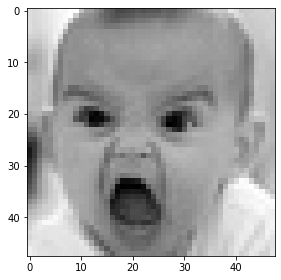

In [3]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread('Training_143373.jpg')
imshow(img)
print(img.shape)

(128, 64)


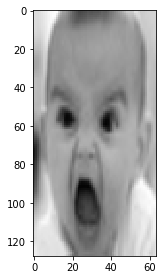

In [68]:
#resizing image 
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

In [69]:
#creating hog features 
f, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

In [71]:
f.shape

(3780,)

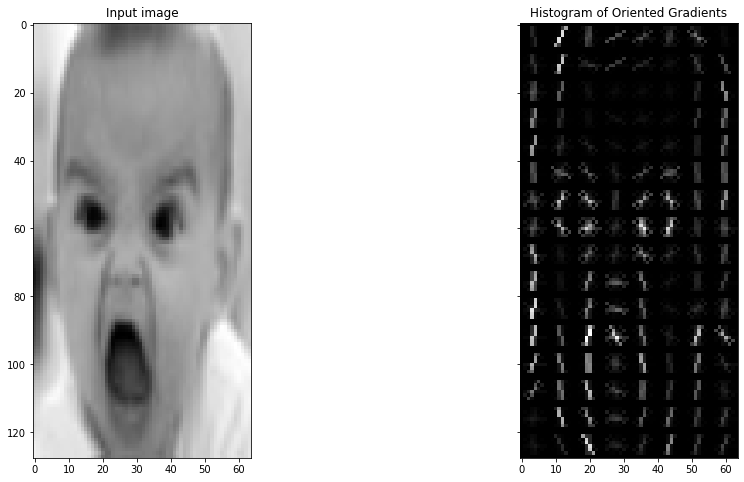

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [4]:
import pandas as pd
import os
import numpy as np

In [5]:
im_df = pd.DataFrame()
im_df['image'] = ''
im_df['lable'] = ''

In [6]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [7]:
for i in emotions:
    for j in os.listdir('fer 2013/train/' + i):
        im_df= im_df.append({'image': j, 'lable': i},ignore_index=True)

In [8]:
im_df.head()

,image,lable
0,Training_10118481.jpg,angry
1,Training_10120469.jpg,angry
2,Training_10131352.jpg,angry
3,Training_10161559.jpg,angry
4,Training_1021836.jpg,angry


In [9]:
im_df = im_df.sample(frac=1)

In [7]:
img = imread('fer 2013/'+'train/'+ im_df['lable'][1] + '/' + im_df['image'][1])
f, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

In [15]:
img2 = imread('fer 2013/'+'train/'+ im_df['lable'][2] + '/' + im_df['image'][2])
f2, hog_image2 = hog(img2, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

In [10]:
t_f = []
t_l = []
# t_f.append(f)
# t_f.append(f2)
# t_l.append(im_df['lable'][1])
# t_l.append('sad')

In [11]:
for i in range(0, len(im_df)):
    image = imread('fer 2013/'+'train/'+ im_df['lable'][i] + '/' + im_df['image'][i])
    fd,img = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
    t_f.append(fd)
    t_l.append(im_df['lable'][i])

In [12]:
len(t_f)

28709

In [69]:
# train_set = pd.DataFrame()

In [70]:
# train_set['feature'] = t_f

In [71]:
# train_set['label'] = t_l

In [72]:
# train_set.head()

,feature,label
0,"[0.1649882492325014, 0.06005869233109221, 0.13...",angry
1,"[0.18047499678695517, 0.05400996334990955, 0.0...",angry
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",angry
3,"[0.24078322636863364, 0.2455696441010626, 0.26...",angry
4,"[0.035101753269009946, 0.00812112049678096, 0....",angry


In [74]:
# train_set = train_set.sample(frac=1)

In [77]:
# t_f1 = train_set['feature']
# t_l1 = train_set['label']

In [52]:
from sklearn import svm
svm_l = svm.SVC()

In [73]:
svm_l.fit(t_f, t_l)

In [1]:
import pickle

In [54]:
# save the model to disk
filename = 'hog_svm.sav'
# pickle.dump(svm_l, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
svm_l = pickle.load(open(filename, 'rb'))

## Testing data

In [13]:
t_im_df = pd.DataFrame()
t_im_df['image'] = ''
t_im_df['lable'] = ''

In [14]:
for i in emotions:
    for j in os.listdir('fer 2013/test/' + i):
        t_im_df= t_im_df.append({'image': j, 'lable': i},ignore_index=True)

In [15]:
test_x = []
test_y = []
# t_f.append(f)
# t_f.append(f2)
# t_l.append(im_df['lable'][1])
# t_l.append('sad')

In [16]:
for i in range(0, len(t_im_df)):
    image = imread('fer 2013/'+'test/'+ t_im_df['lable'][i] + '/' + t_im_df['image'][i])
    fd,img = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
    test_x.append(fd)
    test_y.append(t_im_df['lable'][i])

# SVM

In [22]:
from sklearn.metrics import classification_report

In [55]:
svm_pre = svm_l.predict(test_x)

In [89]:
svm_pre

array(['angry', 'angry', 'sad', ..., 'surprise', 'surprise', 'surprise'],
      dtype='<U8')

In [90]:
test_y

['angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',


In [91]:
print(classification_report(svm_pre, test_y))

              precision    recall  f1-score   support

       angry       0.36      0.43      0.39       808
     disgust       0.20      1.00      0.33        22
        fear       0.30      0.45      0.36       692
       happy       0.80      0.63      0.71      2231
     neutral       0.54      0.48      0.51      1364
         sad       0.45      0.41      0.43      1360
    surprise       0.61      0.73      0.67       701

    accuracy                           0.53      7178
   macro avg       0.47      0.59      0.48      7178
weighted avg       0.56      0.53      0.54      7178



In [56]:
c_m_i_svm = confusion_matrix(svm_pre, test_y)

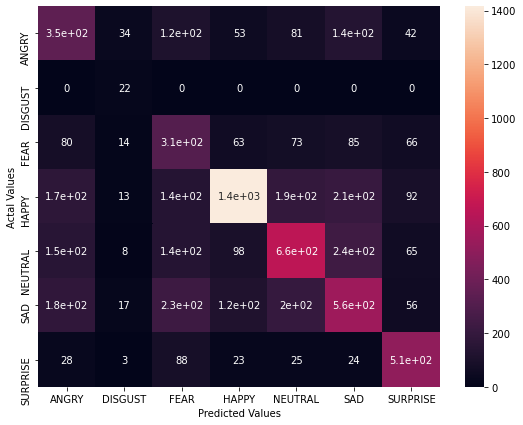

In [68]:
## Confusion Matirx                                                                                                        
cm_svm = pd.DataFrame(c_m_i_svm, index = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'], columns = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']) 
#Plotting the confusion matrix
plt.figure(figsize=(9,7))
sns.heatmap(cm_svm, annot=True)
plt.title('')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
KNN = KNeighborsClassifier(n_neighbors=4)

In [47]:
KNN.fit(t_f, t_l)

KNeighborsClassifier(n_neighbors=4)

In [48]:
KNN_pre = KNN.predict(test_x)

In [49]:
print(classification_report(KNN_pre, test_y))

              precision    recall  f1-score   support

       angry       0.40      0.32      0.36      1214
     disgust       0.42      0.34      0.37       140
        fear       0.33      0.41      0.36       836
       happy       0.78      0.56      0.65      2466
     neutral       0.42      0.42      0.42      1238
         sad       0.22      0.45      0.29       609
    surprise       0.51      0.63      0.56       675

    accuracy                           0.47      7178
   macro avg       0.44      0.44      0.43      7178
weighted avg       0.52      0.47      0.48      7178



In [69]:
c_m_i_knn = confusion_matrix(KNN_pre, test_y)

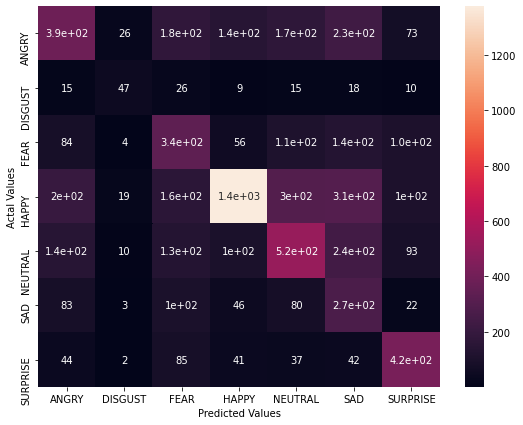

In [71]:
## Confusion Matirx                                                                                                        
cm_knn = pd.DataFrame(c_m_i_knn, index = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'], columns = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']) 
#Plotting the confusion matrix
plt.figure(figsize=(9,7))
sns.heatmap(cm_knn, annot=True)
plt.title('')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
RF = RandomForestClassifier(max_depth=25, random_state=0)

In [19]:
RF.fit(t_f, t_l)

RandomForestClassifier(max_depth=25, random_state=0)

In [20]:
RF_pre = RF.predict(test_x)

In [31]:
print(classification_report(RF_pre, test_y))

              precision    recall  f1-score   support

       angry       0.21      0.41      0.27       485
     disgust       0.27      1.00      0.43        30
        fear       0.27      0.44      0.33       633
       happy       0.84      0.48      0.61      3120
     neutral       0.45      0.40      0.43      1393
         sad       0.29      0.36      0.32       999
    surprise       0.50      0.80      0.62       518

    accuracy                           0.47      7178
   macro avg       0.41      0.56      0.43      7178
weighted avg       0.57      0.47      0.49      7178



In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(RF_pre, test_y))

0.4653106714962385


In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [40]:
c_m_i_rf

array([[ 198,   20,   69,   41,   48,   76,   33],
       [   0,   30,    0,    0,    0,    0,    0],
       [  75,   13,  277,   46,   65,   83,   74],
       [ 331,   26,  308, 1496,  381,  436,  142],
       [ 178,    4,  164,   88,  561,  282,  116],
       [ 159,   16,  154,   96,  162,  362,   50],
       [  17,    2,   52,    7,   16,    8,  416]], dtype=int64)

In [43]:
c_m_i_rf = confusion_matrix(RF_pre, test_y)

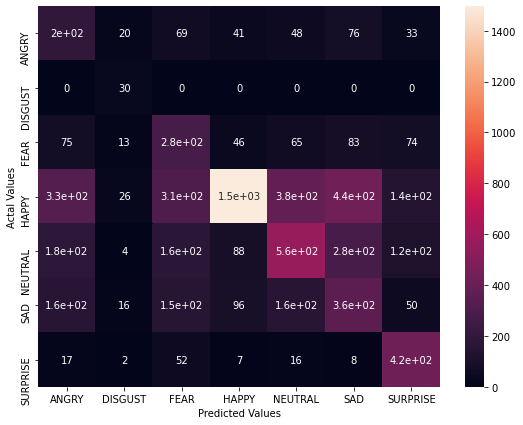

In [72]:
## Confusion Matirx                                                                                                        
cm_rf = pd.DataFrame(c_m_i_rf, index = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'], columns = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']) 
#Plotting the confusion matrix
plt.figure(figsize=(9,7))
sns.heatmap(cm_rf, annot=True)
plt.title('')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [169]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [74]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(t_f, t_l)

In [75]:
rf_random.best_params_

In [32]:
import cv2
from cv2.data import haarcascades
import pandas as pd

In [33]:
data = pd.DataFrame()

In [34]:
data['frame_no.'] = ''
data['Time_Stamp'] = ''
data['Emotion_Predicted'] = ''

In [35]:
facec = cv2.CascadeClassifier(R'C:\Users\Danyal\AppData\Local\Programs\Python\Python39\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')
# model = svm_l()
font = cv2.FONT_HERSHEY_SIMPLEX
cap = cv2.VideoCapture("output.avi")
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
frame_size = (frame_width,frame_height)
fps = 20
frame_no =1

output = cv2.VideoWriter(f'Video_ch', cv2.VideoWriter_fourcc(*'XVID'), 20, frame_size)
while(cap.isOpened()):
    # vid_capture.read() methods returns a tuple, first element is a bool
    # and the second is frame


    ret, frame = cap.read()
    if ret == True:
        gray_fr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = facec.detectMultiScale(gray_fr, 1.3, 5)
        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]
            roi = cv2.resize(fc, (48, 48))
            fea,im1 = hog(roi, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)
            pred = svm_l.predict(fea.reshape(1, -1))
#             print(pred)
#             cv2.putText(frame, pred, (x, y), font, 1, (255, 0, 0), 2)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),4) 


    # Write the frame to the output files
        output.write(frame)

    #Writing the frame and its identified emotion
        data = data.append({'Frame_No.':frame_no,'Time_Stamp':cap.get(cv2.CAP_PROP_POS_MSEC),'Emotion_Predicted':pred},ignore_index= True)

    else:
#             print("Stream disconnected")
        break
    frame_no += 1
data.to_csv('Vedios 1.csv')

cap.release()
output.release()

In [47]:
def mode(ls):
    # dictionary to keep count of each value
    counts = {}
    # iterate through the list
    for item in ls:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
    # get the keys with the max counts
    return [key for key in counts.keys() if counts[key] == max(counts.values())]

In [71]:
facec = cv2.CascadeClassifier(R'C:\Users\Danyal\AppData\Local\Programs\Python\Python39\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')
video_n = []
emo = []
def video_here(v_name):
    # model = svm_l()
    data = pd.DataFrame()
    data['frame_no.'] = ''
    data['Time_Stamp'] = ''
    data['Emotion_Predicted'] = ''
    
    v_name = v_name
    Emotion_Predicted = []
    

    font = cv2.FONT_HERSHEY_SIMPLEX
#     print('videos/'+v_name)
    cap = cv2.VideoCapture('videos/'+v_name)
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    frame_size = (frame_width,frame_height)
    fps = 20
    frame_no =1

    output = cv2.VideoWriter(f'Video_ch', cv2.VideoWriter_fourcc(*'XVID'), 20, frame_size)
    while(cap.isOpened()):
        # vid_capture.read() methods returns a tuple, first element is a bool
        # and the second is frame


        ret, frame = cap.read()
        if ret == True:
            gray_fr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = facec.detectMultiScale(gray_fr, 1.3, 5)
            for (x, y, w, h) in faces:
                fc = gray_fr[y:y+h, x:x+w]
                roi = cv2.resize(fc, (48, 48))
                fea,im1 = hog(roi, orientations=9, pixels_per_cell=(8, 8), 
                        cells_per_block=(2, 2), visualize=True, multichannel=False)
                pred = svm_l.predict(fea.reshape(1, -1))
                Emotion_Predicted.append(pred[0])
#                 print(pred)
    #             cv2.putText(frame, pred, (x, y), font, 1, (255, 0, 0), 2)
                cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),4) 


        # Write the frame to the output files
            output.write(frame)

        #Writing the frame and its identified emotion
#             Emotion_Predicted.append(pred)
#             data = data.append({'Frame_No.':frame_no,'Time_Stamp':cap.get(cv2.CAP_PROP_POS_MSEC),'Emotion_Predicted':pred},ignore_index= True)

        else:
    #             print("Stream disconnected")
            break
        frame_no += 1
#     print(Emotion_Predicted)
    mod_emo = mode(Emotion_Predicted)
    video_n.append(v_name)
    emo.append(mod_emo[0])
    cap.release()
    output.release()






In [74]:
for i in range(0,106):
    if i == 10:
        continue
    video_here('Video ' + str(i) + '.mp4')


In [80]:
len(emo)

106

In [78]:
len(video_n)

106

In [76]:
svm_hog_out = pd.DataFrame()

In [81]:
svm_hog_out['emotion'] = emo
svm_hog_out['Video_name'] = video_n

In [82]:
svm_hog_out.head()

,emotion,Video_name
0,sad,Video 0.mp4
1,sad,Video 0.mp4
2,fear,Video 1.mp4
3,neutral,Video 2.mp4
4,angry,Video 3.mp4


In [85]:
svm_hog_out.to_csv('hog_svm_out.csv', index=False)